<a href="https://colab.research.google.com/github/radhikabandi/ModelViewControllerTechBlog/blob/main/INN_Learner_Notebook_Full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [3]:
# Installing the libraries
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn

## Loading the dataset

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
ds = pd.read_csv('/content/sample_data/Churn.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

In [7]:
# view the first 5 rows of the data
ds.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# view the last 5 rows of the data

ds.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
# check the number of rows and columns in the training data
# data types of the columns

ds.shape
ds.info()
ds.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
# check for missing values in the data

ds.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [11]:
# unique values for each of the column
ds.nunique()


,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [12]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

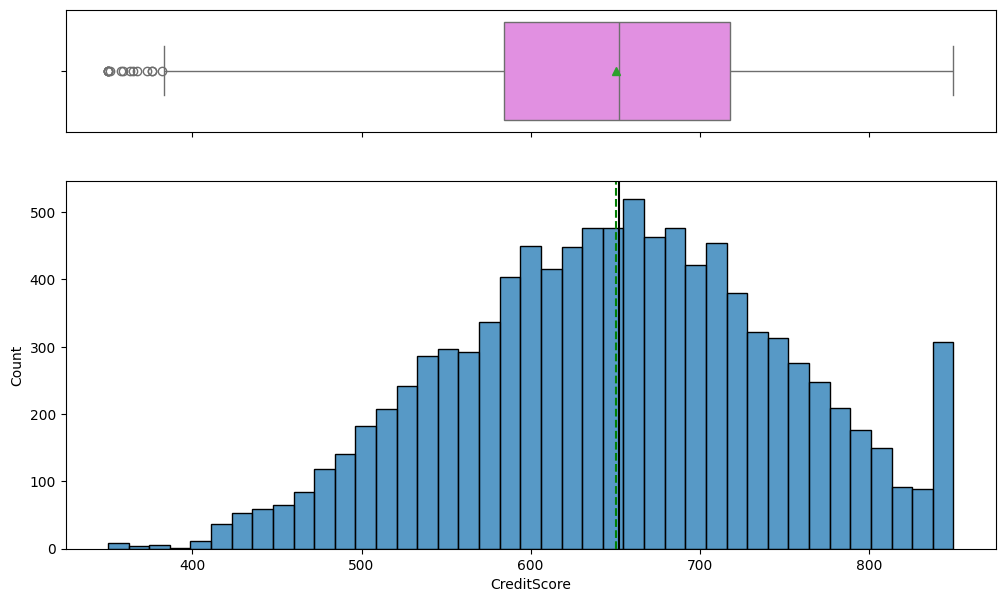

In [15]:
histogram_boxplot(ds,'CreditScore')

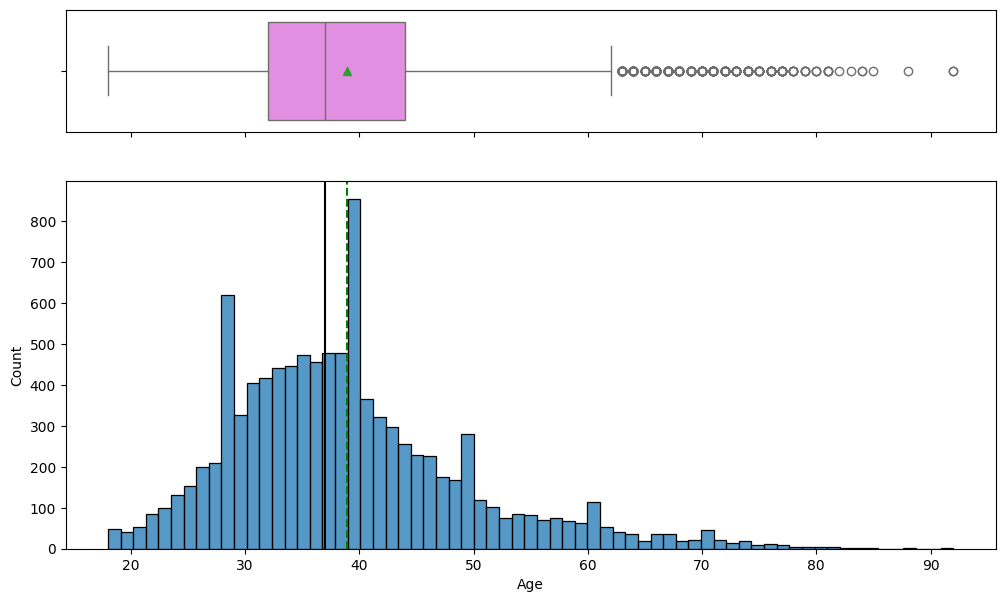

In [16]:
#create histogram_boxplot for Age

histogram_boxplot(ds,'Age')


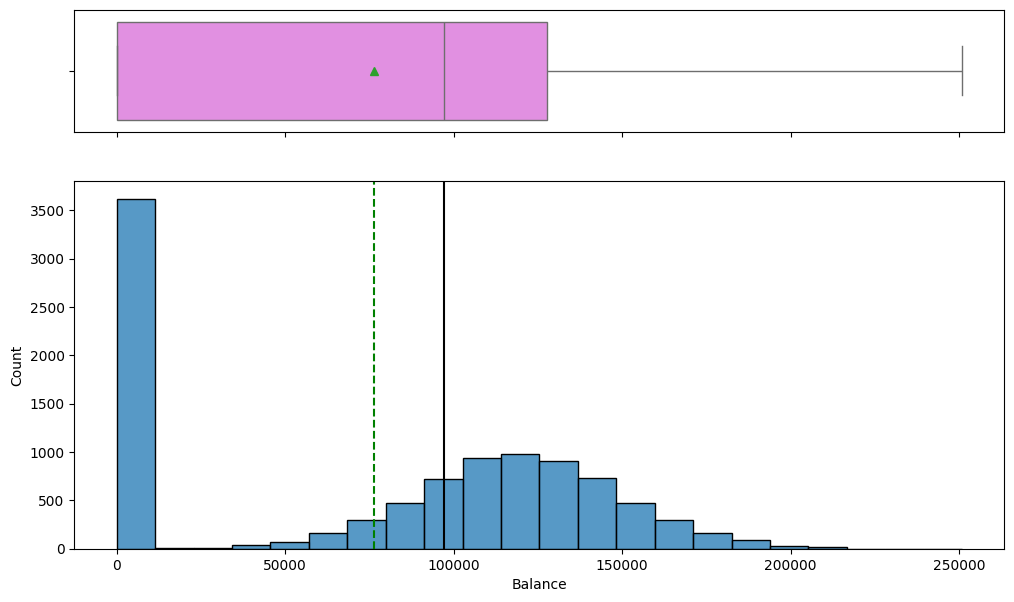

In [17]:
histogram_boxplot(ds,'Balance')


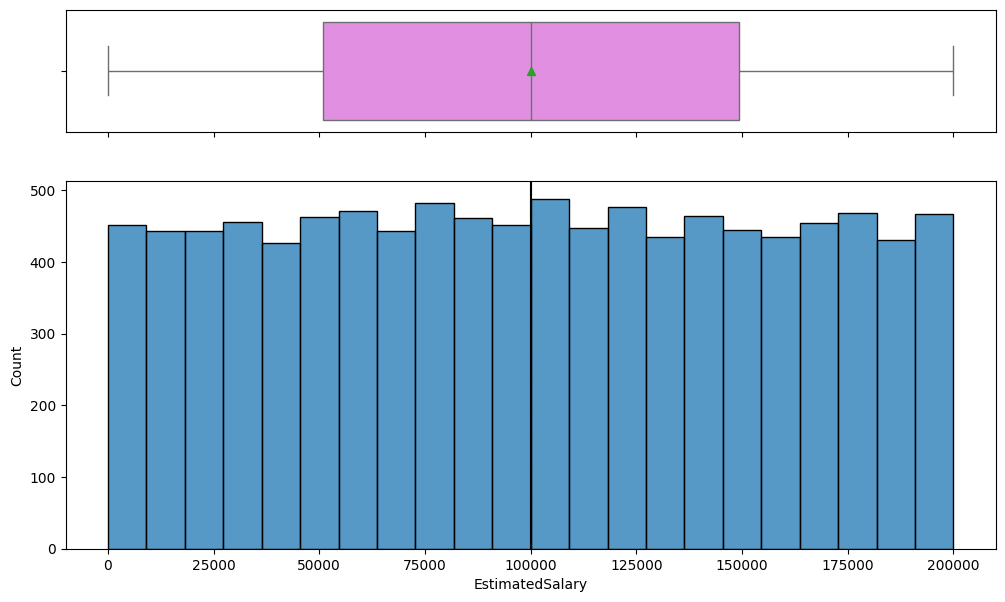

In [18]:
# create histogram_boxplot for Estimated Salary

histogram_boxplot(ds,'EstimatedSalary')


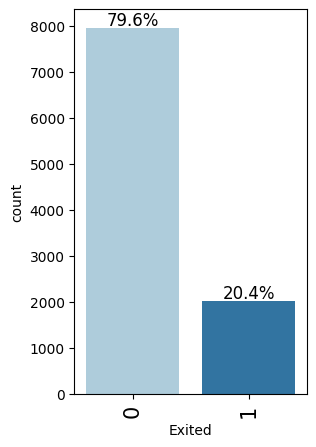

In [19]:
labeled_barplot(ds, "Exited", perc=True)

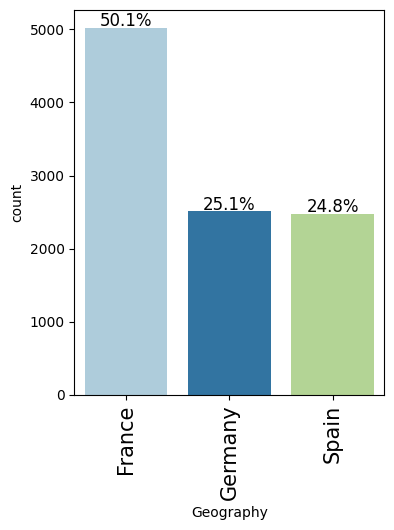

In [20]:
#create labeled_barplot for Geography

labeled_barplot(ds, "Geography", perc=True)


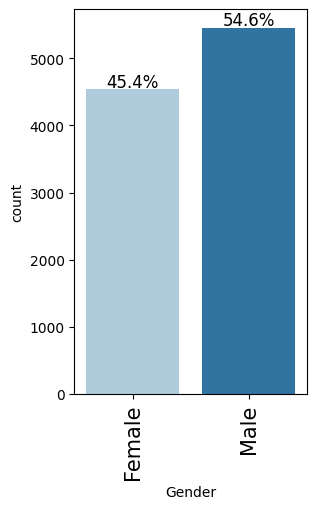

In [21]:
#the code to create labeled_barplot for Gender

labeled_barplot(ds, "Gender", perc=True)


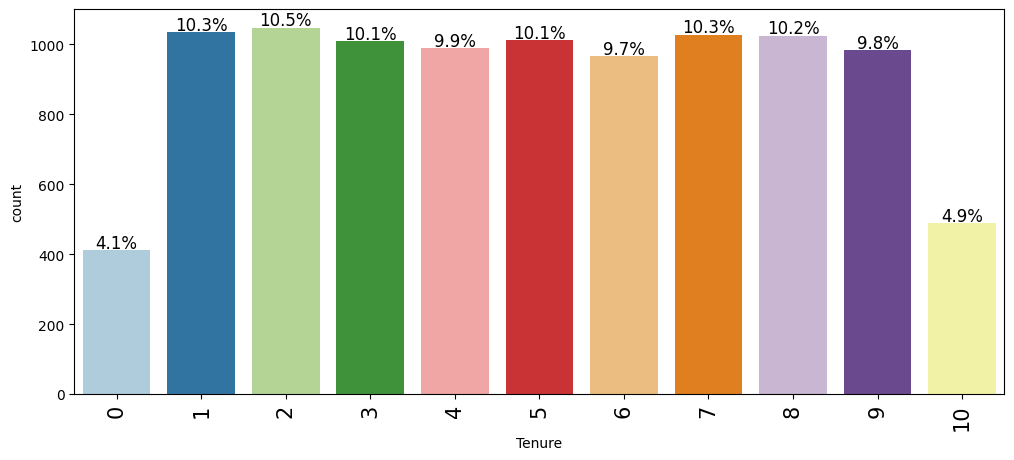

In [22]:
#create labeled_barplot for Tenure

labeled_barplot(ds, "Tenure", perc=True)


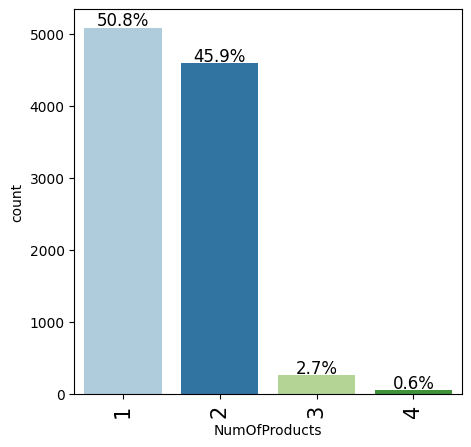

In [23]:
# create labeled_barplot for Number of products

labeled_barplot(ds, "NumOfProducts", perc=True)


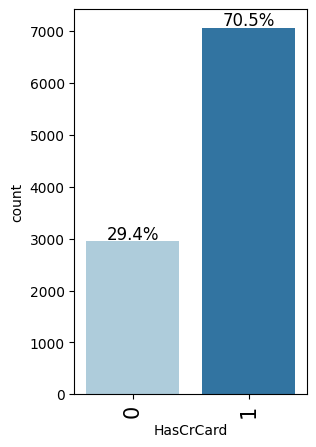

In [24]:
#create labeled_barplot for Has credit card

labeled_barplot(ds, "HasCrCard", perc=True)


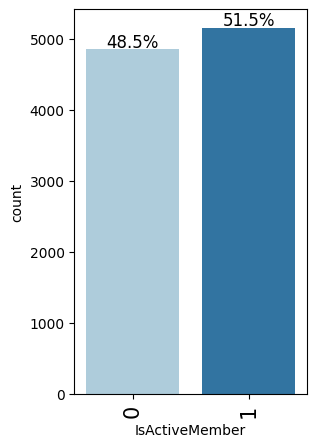

In [25]:
#create labeled_barplot for Is active member

labeled_barplot(ds, "IsActiveMember", perc=True)


### Bivariate Analysis

In [26]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [27]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

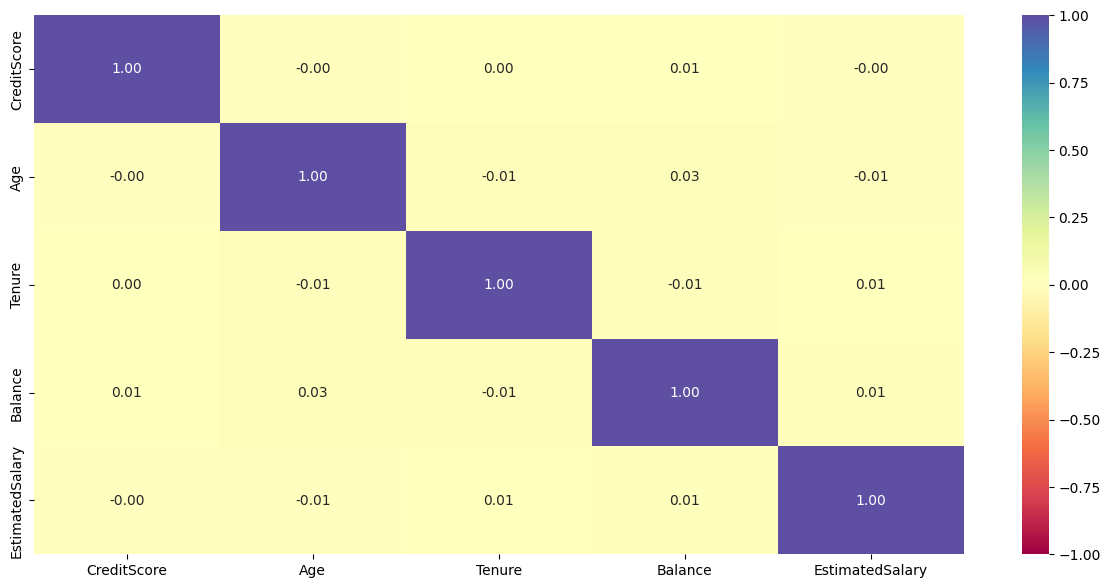

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


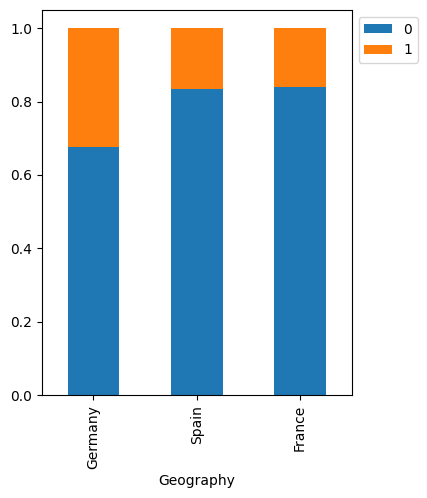

In [29]:
stacked_barplot(ds, "Geography", "Exited" )

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


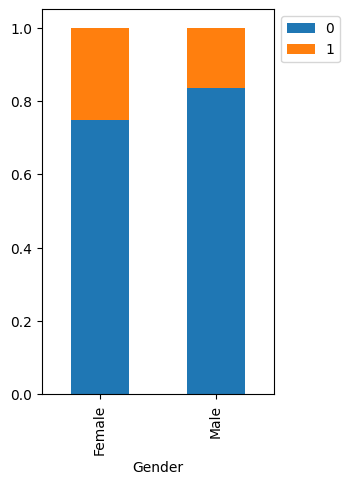

In [30]:
#plot stacked barplot for Exited and Gender

stacked_barplot(ds, "Gender", "Exited")


Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


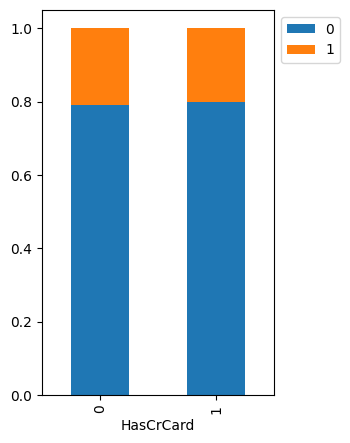

In [31]:
# plot stacked barplot for Exited and Has credit card

stacked_barplot(ds, "HasCrCard", "Exited")


Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


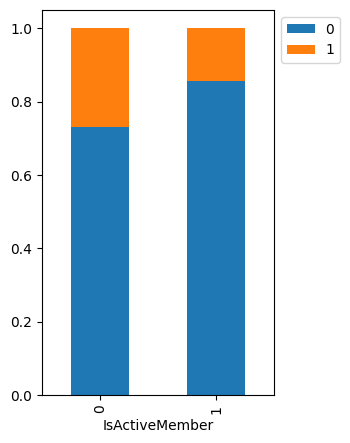

In [52]:
#plot stacked barplot for Exited and Is active member

stacked_barplot(ds, "IsActiveMember", "Exited")


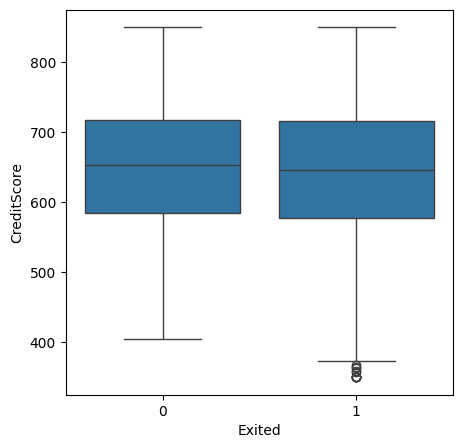

In [53]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

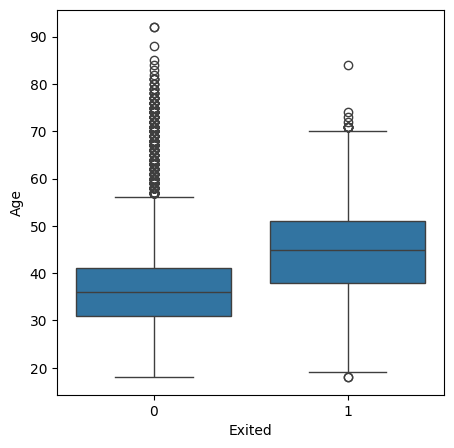

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()


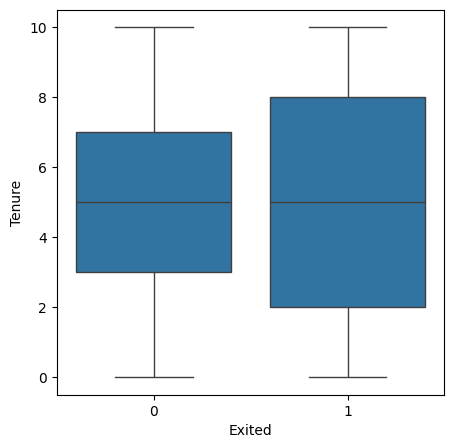

In [55]:

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()


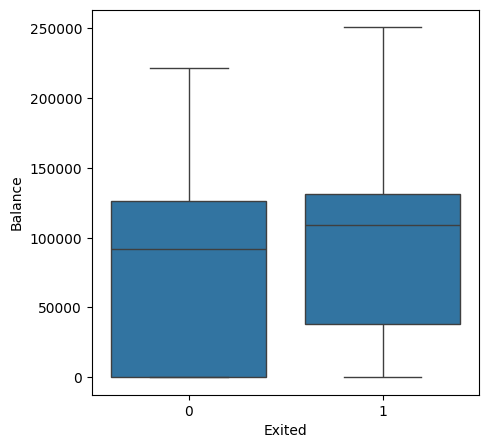

In [56]:

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()


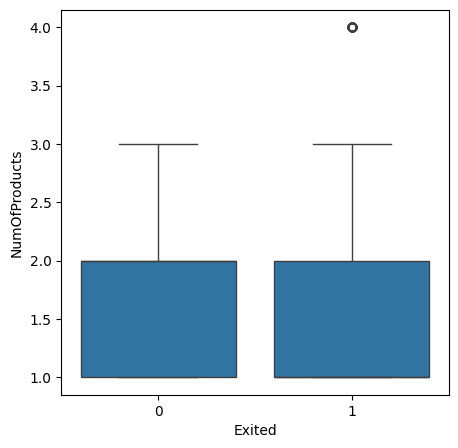

In [57]:

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()


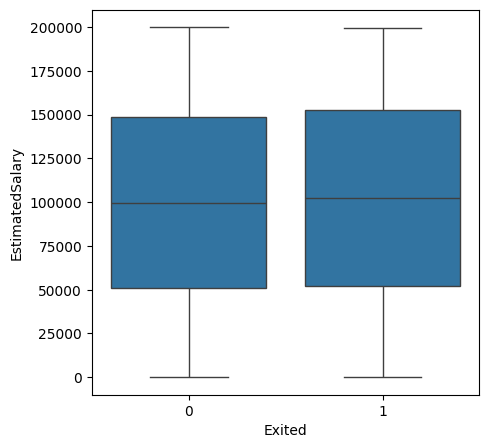

In [58]:

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()


## Data Preprocessing

### Dummy Variable Creation

In [71]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

### Train-validation-test Split

In [72]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [73]:
# Splitting the dataset into the Training and Testing set.
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set


In [74]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.25, random_state = 42,stratify=y_large, shuffle = True)


In [75]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


### Data Normalization

In [76]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])


## Model Building

In [77]:
#create a function for plotting the confusion matrix
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [78]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

## Model Performance Improvement

In [79]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [80]:
# Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# Complete the code to add the output layer with the num

In [81]:
#Initializing the neural network
model_0 = Sequential()
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_0.add(Dense(32, activation='relu'))
# Add an output layer with a single node and sigmoid activation
model_0.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

#use SGD as the optimizer
optimizer = tf.keras.optimizers.SGD(0.001)
metric = keras.metrics.Recall()

#compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
# Fitting the ANN
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=100,
    verbose=1
)


Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.6763 - recall: 0.2754 - val_loss: 0.6256 - val_recall: 0.0762
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6071 - recall: 0.0550 - val_loss: 0.5780 - val_recall: 0.0074
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5634 - recall: 0.0023 - val_loss: 0.5478 - val_recall: 0.0000e+00
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5353 - recall: 0.0000e+00 - val_loss: 0.5282 - val_recall: 0.0000e+00
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5167 - recall: 0.0000e+00 - val_loss: 0.5151 - val_recall: 0.0000e+00
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5039 - recall: 0.0000e+00 - val_loss: 0.5059 - val_recall: 0.0000e+00
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4947 - recall: 0.0000e+00 - val_loss: 0.4991 - val_recall: 0.0000e+00
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4877 - recall: 0.0000e+00

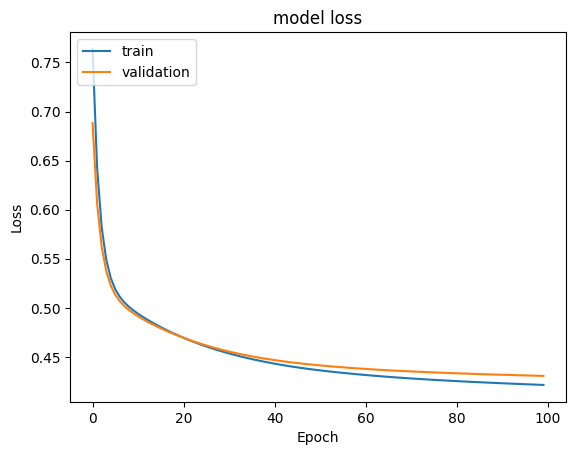

In [87]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

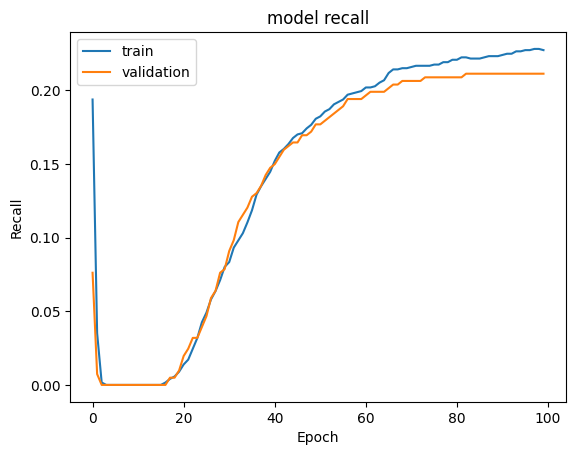

In [84]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [85]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [86]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)

# Defining y_val_pred
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [87]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      4777
           1       0.64      0.23      0.34      1223

    accuracy                           0.82      6000
   macro avg       0.74      0.60      0.62      6000
weighted avg       0.79      0.82      0.78      6000



In [88]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.60      0.21      0.31       407

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



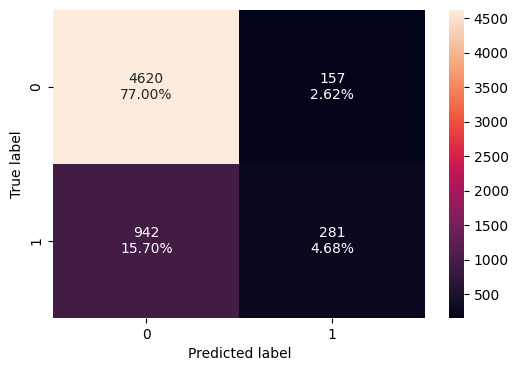

In [89]:
make_confusion_matrix(y_train, y_train_pred)

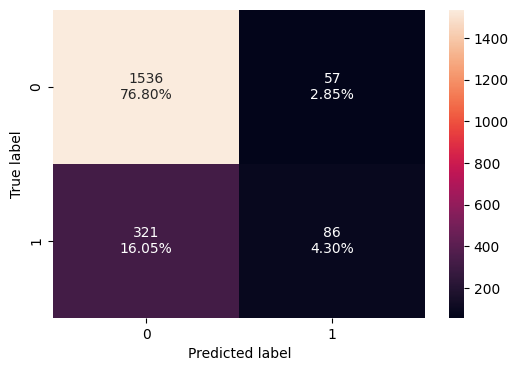

In [90]:
# check the model's performance on the validation set

make_confusion_matrix(y_val, y_val_pred)


### Neural Network with Adam Optimizer and Dropout

In [91]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [92]:
import numpy as np
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)
### Task:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dropout(0.2))
model_2.add(Dense(16, activation='relu'))


In [93]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dropout(0.2))
model_2.add(Dense(16, activation='relu'))

### Task:
optimizer = tf.keras.optimizers.Adam()
metric = keras.metrics.Recall()



In [94]:
model_2.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))


model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])


In [98]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

In [100]:

#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))


model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

model_2.summary()

history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(X_val,y_val)
)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

Epoch 1/100


ValueError: Unknown variable: <KerasVariable shape=(11, 64), dtype=float32, path=sequential_5/dense_14/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

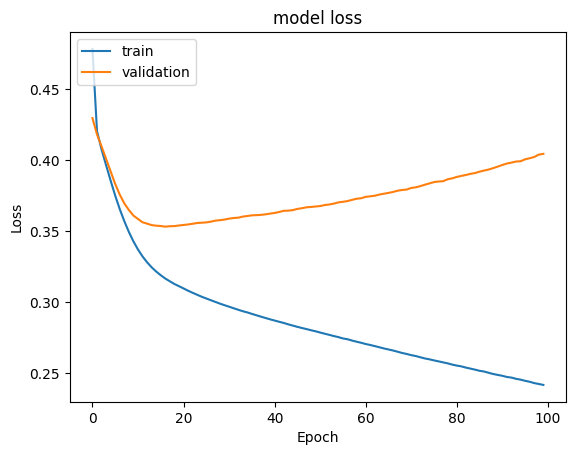

In [101]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

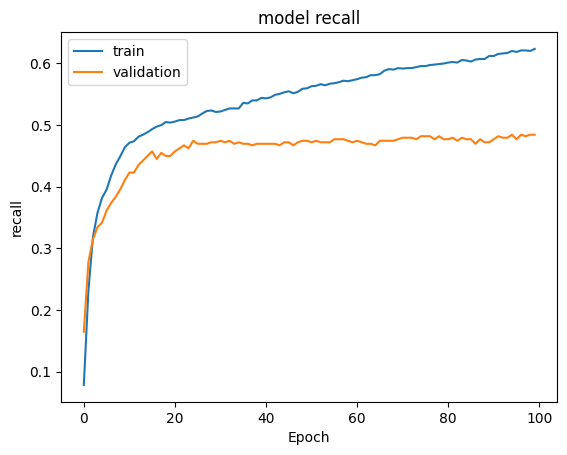

In [109]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [102]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [103]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [104]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [105]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      4777
           1       0.24      0.18      0.21      1223

    accuracy                           0.72      6000
   macro avg       0.52      0.52      0.52      6000
weighted avg       0.69      0.72      0.70      6000



In [106]:
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1593
           1       0.27      0.19      0.23       407

    accuracy                           0.73      2000
   macro avg       0.54      0.53      0.53      2000
weighted avg       0.70      0.73      0.71      2000



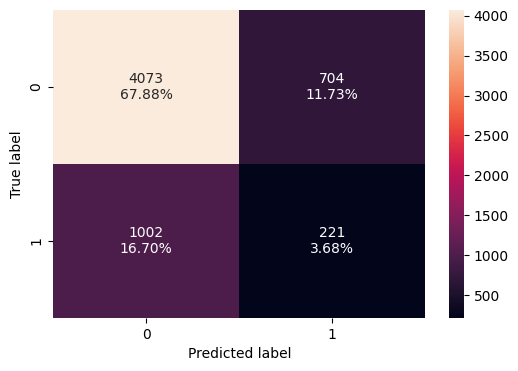

In [107]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

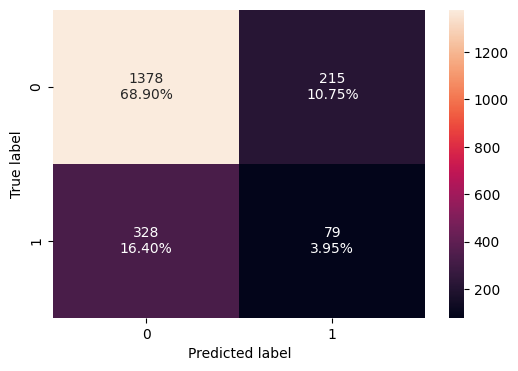

In [108]:
make_confusion_matrix(y_val, y_val_pred)


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [109]:
sm  = SMOTE(random_state=42)
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))


After UpSampling, the shape of train_X: (9554, 11)
After UpSampling, the shape of train_y: (9554,) 



In [110]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [115]:
#Initializing the model
model_3 = Sequential()
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
model_3.add(Dense(16,activation='relu'))
# Add a new output layer with a single neuron and sigmoid activation
model_3.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

optimizer = tf.keras.optimizers.SGD(0.001) # Define the optimizer here
metric = 'accuracy'

#compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric]) # Compile the model after defining the optimizer

In [116]:
optimizer = tf.keras.optimizers.SGD(0.001)
metric = 'accuracy'



In [117]:
model_3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data = (X_val,y_val),

)


Epoch 1/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4508 - loss: 0.7192 - val_accuracy: 0.6035 - val_loss: 0.6825
Epoch 2/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4669 - loss: 0.7091 - val_accuracy: 0.6160 - val_loss: 0.6769
Epoch 3/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4910 - loss: 0.7007 - val_accuracy: 0.6455 - val_loss: 0.6715
Epoch 4/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5208 - loss: 0.6931 - val_accuracy: 0.6710 - val_loss: 0.6662
Epoch 5/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5494 - loss: 0.6862 - val_accuracy: 0.6930 - val_loss: 0.6607
Epoch 6/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5758 - loss: 0.6796 - val_accuracy: 0.7080 - val_loss: 0.6550
Epoch 7/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6022 - loss: 0.6731 - val_accuracy: 0.7180 - val_loss: 0.6485
Epoch 8/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6271 - loss: 0.6664 - val_accu

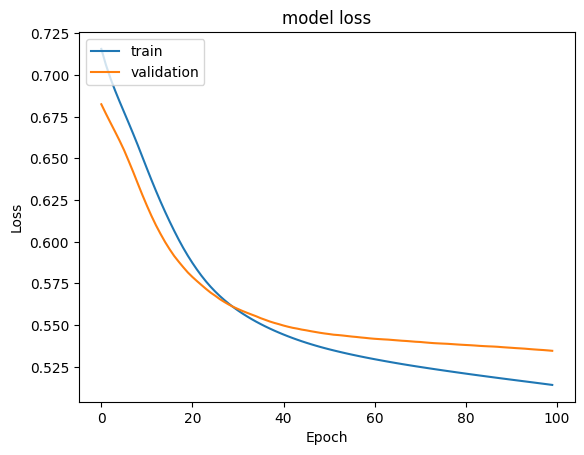

In [119]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7950 - loss: 0.4502 - val_accuracy: 0.7650 - val_loss: 0.4944
Epoch 2/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7952 - loss: 0.4499 - val_accuracy: 0.7655 - val_loss: 0.4943
Epoch 3/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7954 - loss: 0.4497 - val_accuracy: 0.7655 - val_loss: 0.4941
Epoch 4/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7956 - loss: 0.4494 - val_accuracy: 0.7655 - val_loss: 0.4938
Epoch 5/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7956 - loss: 0.4491 - val_accuracy: 0.7650 - val_loss: 0.4936
Epoch 6/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7954 - loss: 0.4488 - val_accuracy: 0.7655 - val_loss: 0.4935
Epoch 7/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7956 - loss: 0.4486 - val_accuracy: 0.7660 - val_loss: 0.4931
Epoch 8/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 0.4483 - val_accu

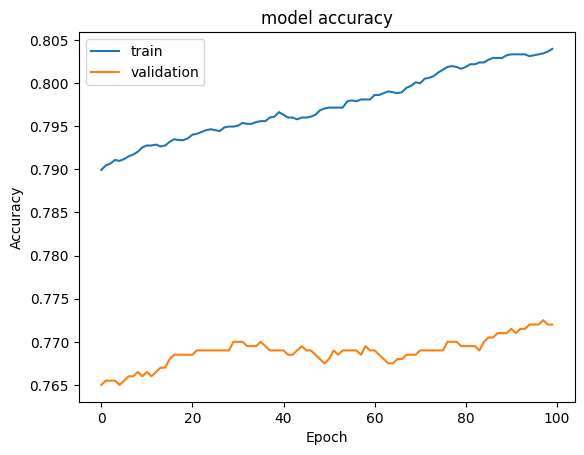

In [123]:
#Fitting the ANN
model_3.compile(
    optimizer=optimizer, # Pass the optimizer here
    loss='binary_crossentropy', # Add your loss function
    metrics=[metric] # Add your metrics here
)

history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data = (X_val,y_val),
)

#Plotting Train accuracy vs Validation accuracy
plt.plot(history_3.history['accuracy']) # Access the accuracy metric from the history
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [124]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [125]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [126]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [127]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4777
           1       0.80      0.81      0.81      4777

    accuracy                           0.80      9554
   macro avg       0.80      0.80      0.80      9554
weighted avg       0.80      0.80      0.80      9554



In [128]:
cr=classification_report(y_val,y_val_pred)


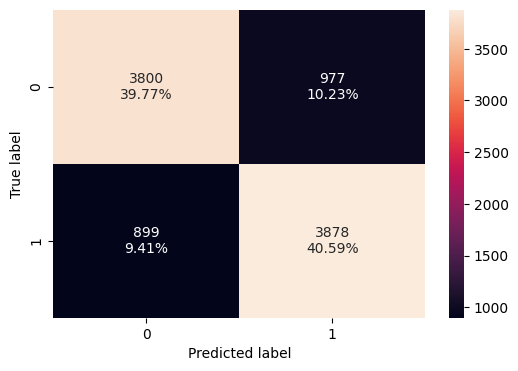

In [129]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

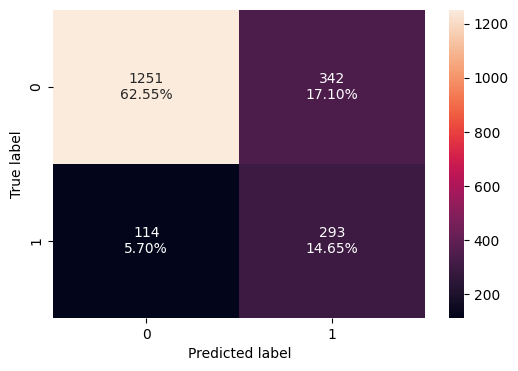

In [130]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [132]:
backend.clear_session()
#Fixing the seed for random number generators
random.seed(2)
tf.random.set_seed(2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6476 - loss: 0.6266 - val_accuracy: 0.6760 - val_loss: 0.5978
Epoch 2/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7365 - loss: 0.5374 - val_accuracy: 0.6845 - val_loss: 0.5814
Epoch 3/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7514 - loss: 0.5104 - val_accuracy: 0.7085 - val_loss: 0.5708
Epoch 4/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7699 - loss: 0.4886 - val_accuracy: 0.7200 - val_loss: 0.5570
Epoch 5/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7801 - loss: 0.4750 - val_accuracy: 0.7285 - val_loss: 0.5444
Epoch 6/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7842 - loss: 0.4645 - val_accuracy: 0.7335 - val_loss: 0.5359
Epoch 7/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7867 - loss: 0.4564 - val_accuracy: 0.7345 - val_loss: 0.5304
Epoch 8/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7884 - loss: 0.4498 - val_accu

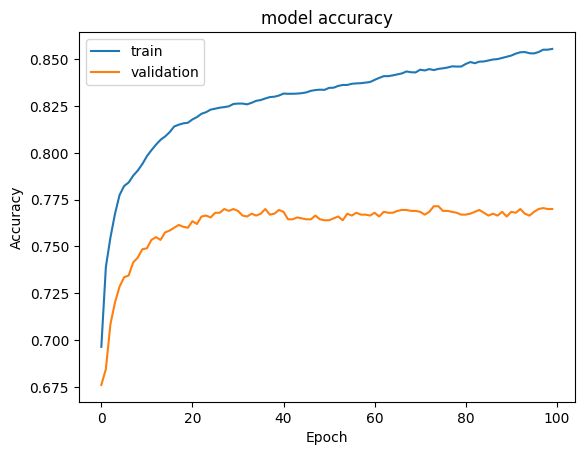

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      4777
           1       0.82      0.90      0.86      4777

    accuracy                           0.85      9554
   macro avg       0.86      0.85      0.85      9554
weighted avg       0.86      0.85      0.85      9554

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1593
           1       0.46      0.73      0.56       407

    accuracy                           0.77      2000
   macro avg       0.69      0.75      0.70      2000
weighted avg       0.82      0.77      0.79      2000



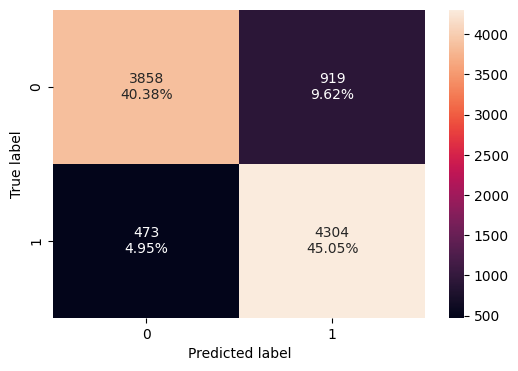

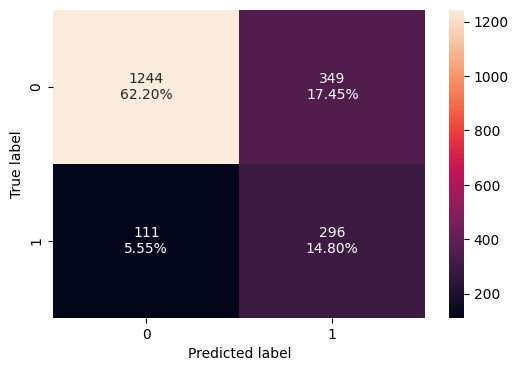

In [133]:
import matplotlib.pyplot as plt
#Initializing the model
model_4 = Sequential()
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
model_4.add(Dense(16,activation='relu'))
model_4.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
metric = 'accuracy'

model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

model_4.summary()

history_4 = model_4.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data = (X_val,y_val),
)


#Plotting Train accuracy vs Validation accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)
cr=classification_report(y_train_smote,y_train_pred)
print(cr)
cr=classification_report(y_val,y_val_pred)
print(cr)

#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)



### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [134]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6367 - loss: 0.6417 - val_accuracy: 0.6880 - val_loss: 0.5790
Epoch 2/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7143 - loss: 0.5758 - val_accuracy: 0.7025 - val_loss: 0.5696
Epoch 3/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7210 - loss: 0.5563 - val_accuracy: 0.7110 - val_loss: 0.5565
Epoch 4/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7325 - loss: 0.5427 - val_accuracy: 0.7180 - val_loss: 0.5571
Epoch 5/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7420 - loss: 0.5288 - val_accuracy: 0.7265 - val_loss: 0.5468
Epoch 6/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7437 - loss: 0.5194 - val_accuracy: 0.7310 - val_loss: 0.5375
Epoch 7/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7516 - loss: 0.5127 - val_accuracy: 0.7350 - val_loss: 0.5396
Epoch 8/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7600 - loss: 0.5000 - val_accu

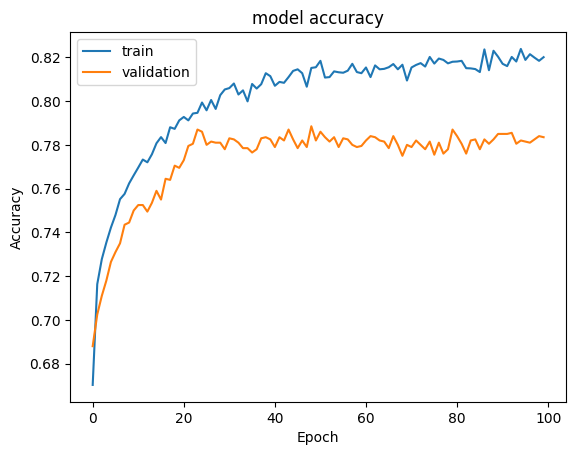

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4777
           1       0.83      0.85      0.84      4777

    accuracy                           0.84      9554
   macro avg       0.84      0.84      0.84      9554
weighted avg       0.84      0.84      0.84      9554

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1593
           1       0.48      0.71      0.57       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.71      2000
weighted avg       0.83      0.78      0.80      2000



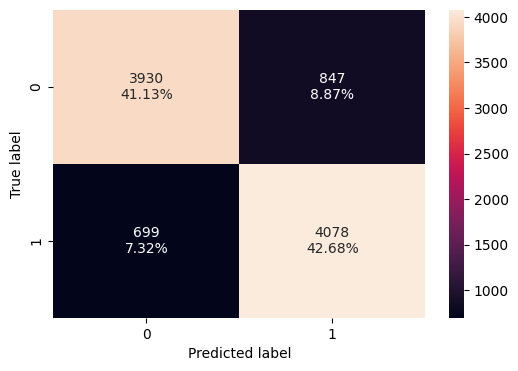

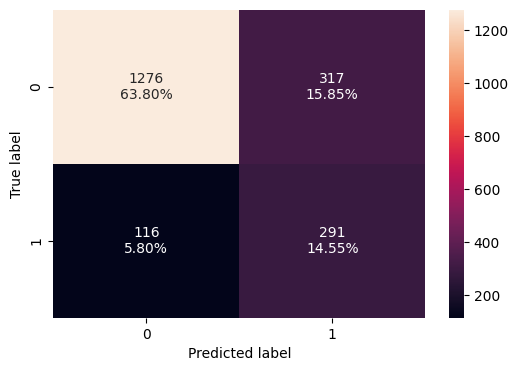

In [135]:

import matplotlib.pyplot as plt
#Initializing the model
model_5 = Sequential()
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
model_5.add(Dropout(0.2))
model_5.add(Dense(16,activation='relu'))

model_5.add(Dropout(0.2))
model_5.add(Dense(1, activation='sigmoid')) # Output layer for binary classification
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
metric = 'accuracy'

model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

model_5.summary()

history_5 = model_5.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data = (X_val,y_val),
)


#Plotting Train accuracy vs Validation accuracy
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

model_name = "NN with SMOTE, Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)
cr=classification_report(y_train_smote,y_train_pred)
print(cr)
cr=classification_report(y_val,y_val_pred)
print(cr)

#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)


## Model Performance Comparison and Final Model Selection

In [136]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.229763
NN with Adam & Dropout,0.180703
NN with SMOTE & SGD,0.811807
NN with SMOTE & Adam,0.900984
"NN with SMOTE, Adam & Dropout",0.853674


In [137]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.211302
NN with Adam & Dropout,0.194103
NN with SMOTE & SGD,0.719902
NN with SMOTE & Adam,0.727273
"NN with SMOTE, Adam & Dropout",0.714988


In [138]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.018461
NN with Adam & Dropout,-0.013400
NN with SMOTE & SGD,0.091905
NN with SMOTE & Adam,0.173711
"NN with SMOTE, Adam & Dropout",0.138686


In [139]:

y_test_pred = model_5.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [140]:
#print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.72      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



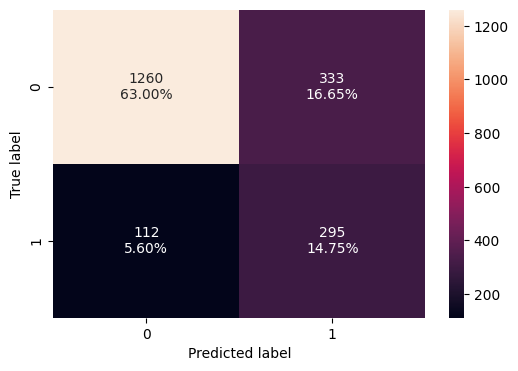

In [141]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___